Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/11
1875/1875 [==============================] - 13s 6ms/step - loss: 0.6391 - accuracy: 0.8379 - val_loss: 0.3568 - val_accuracy: 0.9045
Epoch 2/11
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3364 - accuracy: 0.9058 - val_loss: 0.2940 - val_accurac

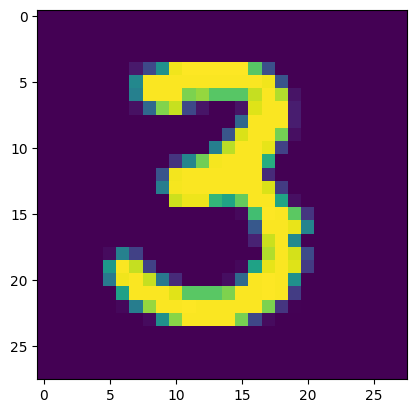

313/313 [==============================] - 2s 4ms/step
Target Value:  3
Predicted Value:  3


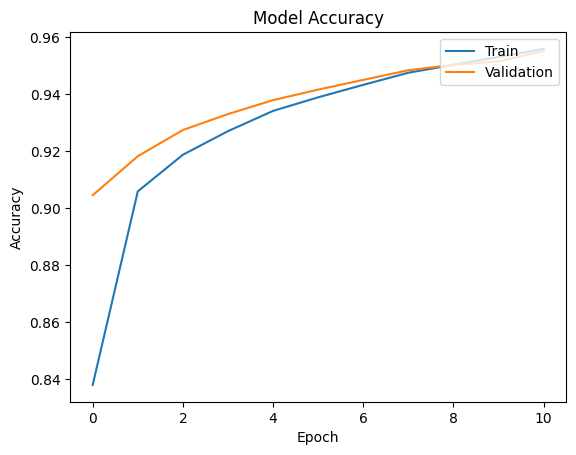

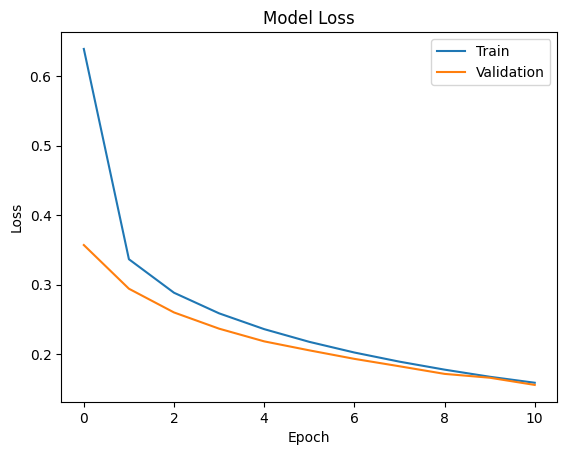

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

# Load training data from CSV
train_data = pd.read_csv('Dataset/mnist_train.csv')
xtrain = train_data.drop('label', axis=1).values
ytrain = train_data['label'].values

# Load testing data from CSV
test_data = pd.read_csv('Dataset/mnist_test.csv')
xtest = test_data.drop('label', axis=1).values
ytest = test_data['label'].values

# Reshape data to 28x28 images
xtrain = xtrain.reshape(-1, 28, 28)
xtest = xtest.reshape(-1, 28, 28)

# Normalize pixel values to be between 0 and 1
xtrain = xtrain / 255.0
xtest = xtest / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])
model.summary()

# Compile the model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=11)

# Evaluate the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print("Loss = %.3f" % test_loss)
print("Acc = %.3f" % test_acc)

# Plot a random image from the test set
n = random.randint(0, len(xtest) - 1)
plt.imshow(xtest[n])
plt.show()

# Make predictions on the test set
predicted_value = model.predict(xtest)
print("Target Value: ", ytest[n])
print("Predicted Value: ", np.argmax(predicted_value[n]))

# Plot training history
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


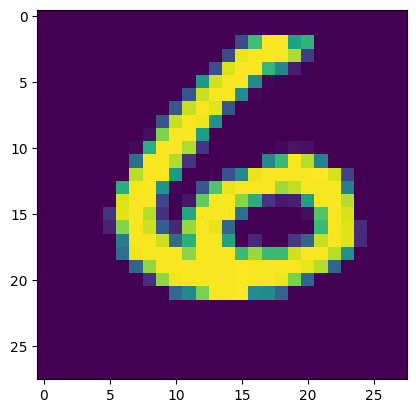

313/313 [==============================] - 1s 4ms/step
Target Value:  6
Predicted Value:  6


In [6]:
# Plot a random image from the test set
n = random.randint(0, len(xtest) - 1)
plt.imshow(xtest[n])
plt.show()

# Make predictions on the test set
predicted_value = model.predict(xtest)
print("Target Value: ", ytest[n])
print("Predicted Value: ", np.argmax(predicted_value[n]))